In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
from neuralmonkey.classes.session import load_mult_session_helper
from pythonlib.tools.stroketools import strokesInterpolate2
import pythonlib
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import random
import math
import os
import pandas as pd

In [ ]:
# across trials in given session, want to know the following:
# - frequency of seqc0shape
# - frequency of seqc0loc
# - frequency of shape-fixation (esp. first one)
# - frequency of loc-fixation (esp. first one)
#
# coding goal: for a given trial, make parallel plots of shape-fixation and neural data in 200ms (100 b/a) window


Searching using this string:
/home/kgg/mnt/Freiwald/ltian/recordings/*Diego*/*230628*/**
Found this many paths:
1
---
/home/kgg/mnt/Freiwald/ltian/recordings/Diego/230628/Diego-230628-144138
session:  0
Beh Sessions that exist on this date:  {230628: [(1, 'primsingridfixed6cDiego')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['primsingridfixed6cDiego']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/kgg/mnt/Freiwald/ltian/recordings/*Diego*/*230628*/**
Found this many paths:
1
---
/home/kgg/mnt/Freiwald/ltian/recordings/Diego/230628/Diego-230628-144138
{'filename_components_hyphened': ['Diego', '230628', '144138'], 'basedirs': ['/home/kgg/mnt/Freiwald/ltian/recordings/Diego', '/home/kgg/mnt/Freiwald/ltian/recordings/Diego/230628'], 'basedirs_filenames': ['230628', 'Diego-230628-144138'], 'filename_final_ext': 'Diego-230628-144138', 'filename_final_noext': 'Diego-230628-144138'}
FOund

ADded new column: supervision_online
Appended self.Dat[superv_SEQUENCE_SUP]
Appended self.Dat[superv_SEQUENCE_ALPHA]
Appended self.Dat[superv_COLOR_ON]
Appended self.Dat[superv_COLOR_ITEMS_FADE_TO_DEFAULT_BINSTR]
Appended self.Dat[superv_COLOR_METHOD]
Appended self.Dat[superv_GUIDEDYN_ON]
Appended self.Dat[superv_VISUALFB_METH]
appended col to self.Dat:
supervision_stage_new
Appended self.Dat[superv_SEQUENCE_SUP]
Appended self.Dat[superv_COLOR_ON]
Appended self.Dat[superv_COLOR_METHOD]
Appended self.Dat[superv_COLOR_ITEMS_FADE_TO_DEFAULT_BINSTR]
Appended self.Dat[superv_GUIDEDYN_ON]
appended col to self.Dat:
supervision_stage_concise
Append column to self.Dat:  supervision_stage_semantic
Extracted into self.Dat[epoch_orig]
Modified self.Dat[epoch]
837
- starting/ending len (getting sequence):
837
837
--- Removing nans
start len: 837
- num names for each col
not removing nans, since columns=[]
Reassigned train/test, using key: probe
and values:
Train =  [0]
Test =  [1]
 
New distributio

1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432


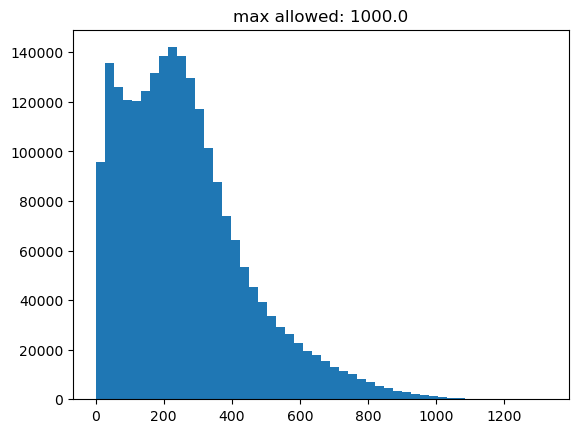

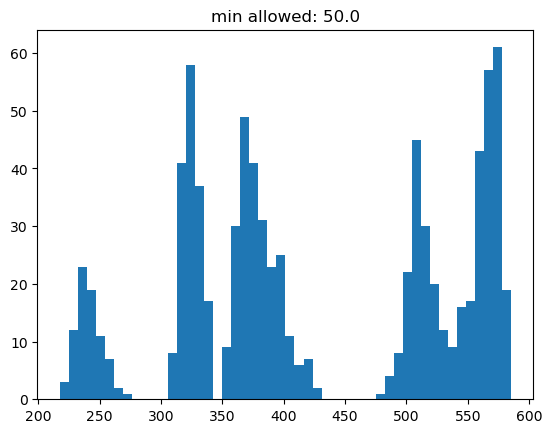

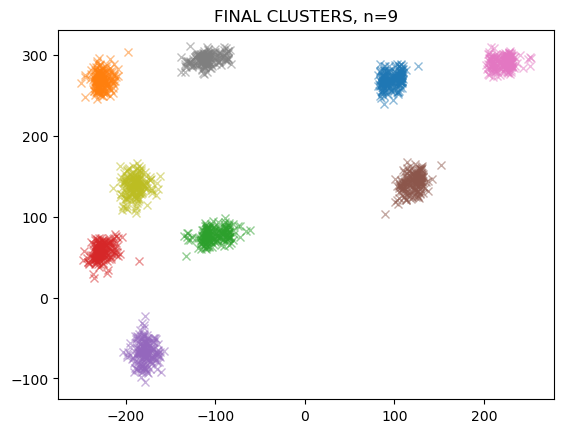

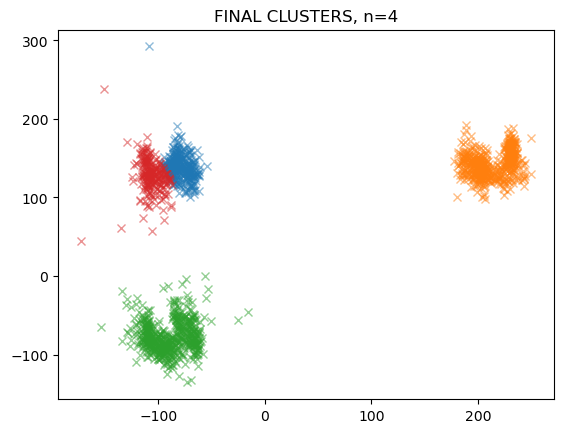

In [19]:
## LOAD IN SESSION ##

date = 230628
animal = "Diego"
session = 0
basedir = "/home/kgg/Desktop/eyetracking_analyses/"

# change to base dir
os.chdir(basedir)

# mkdir for animal-date-session
dirn = animal + "-" + str(date) + "-" + str(session)
os.makedirs(dirn, exist_ok=True)
os.chdir(dirn)

# load session
#MS = load_mult_session_helper(date, animal)
MS = load_mult_session_helper(date, animal, MINIMAL_LOADING=True, spikes_version="kilosort")
sn = MS.SessionsList[session]

In [20]:
cdf = sn.extract_clusterfix_results_dataframe()

In [21]:
cdf

,neuraltrialnum,trialcode,fs,x,y,times,fixation_start_inds,fixation_end_inds,fixation_centroids_x,fixation_centroids_y,saccade_start_inds,saccade_end_inds
0,0,230628-1-1,0.005,"[474.5630388282799, 475.0445873038475, 475.115...","[179.35345169128425, 178.69578625811116, 178.4...","[-1.0062822677467302, -1.001279813181302, -0.9...","[1, 158, 176, 190, 297, 363, 416, 480, 613, 66...","[147, 162, 182, 276, 352, 404, 468, 598, 646, ...","[478.2969811423274, -600.4641542668327, 397.73...","[164.0439025557361, 792.1081724343762, 184.647...","[148, 163, 183, 277, 353, 405, 470, 599, 647, ...","[157, 174, 189, 296, 362, 415, 478, 612, 661, ..."
1,1,230628-1-2,0.005,"[345.36182523020693, 346.0000459960095, 345.67...","[-39.12336252519985, -40.12827740545899, -40.0...","[-1.0000693690255886, -0.9950667673474469, -0....","[95, 138, 205, 257, 297, 331, 474, 530, 569, 6...","[122, 186, 246, 286, 322, 443, 507, 556, 595, ...","[14.894326642358818, 499.86588693387694, 254.9...","[114.40986213682325, 204.0480497237887, -141.5...","[81, 123, 187, 248, 287, 323, 444, 508, 557, 5...","[94, 136, 204, 256, 296, 330, 473, 528, 568, 6..."
2,2,230628-1-3,0.005,"[505.64902199225014, 506.4460831764014, 506.08...","[182.28763610066326, 181.33697987265114, 181.7...","[-1.0004092743491668, -0.9954059186202454, -0....","[3, 86, 152, 203, 235, 290, 327, 360, 429, 518...","[73, 138, 190, 226, 270, 317, 351, 412, 497, 5...","[499.529901862403, 437.77698929240535, 184.612...","[171.3383170661047, 53.54433495780642, 140.393...","[74, 140, 191, 228, 272, 318, 353, 413, 498, 5...","[84, 151, 202, 234, 289, 326, 358, 428, 517, 5..."
3,3,230628-1-4,0.005,"[60.10861040213244, 58.38924872371518, 58.7415...","[-206.95229501054231, -205.97225708806468, -20...","[-1.0001034953788448, -0.9951027097979267, -0....","[4, 60, 85, 230, 268, 314, 431, 485, 541, 584,...","[42, 70, 216, 257, 307, 412, 475, 521, 572, 61...","[56.232241115936176, -599.6955283494618, -209....","[-207.48905019856662, 791.7743413715256, -60.2...","[43, 71, 217, 258, 308, 413, 476, 522, 573, 61...","[59, 84, 229, 267, 313, 429, 484, 540, 582, 62..."
4,4,230628-1-5,0.005,"[240.84000376326955, 240.58290056908913, 239.5...","[39.628521737029374, 39.63040031276748, 40.029...","[-1.0009284659676538, -0.9959271184532699, -0....","[3, 87, 141, 203, 239, 275, 307, 438, 555, 602...","[71, 127, 190, 226, 264, 299, 417, 532, 591, 6...","[232.09835285212282, 486.3742855443336, 308.29...","[38.21599585344009, 184.39426928725211, 32.544...","[72, 128, 191, 228, 266, 300, 418, 534, 592, 6...","[85, 140, 202, 238, 274, 306, 436, 554, 601, 7..."
...,...,...,...,...,...,...,...,...,...,...,...,...
832,1194,230628-1-1195,0.005,"[-203.10989958284398, -202.34187115550174, -20...","[-479.3377070367451, -480.19523461660424, -481...","[-1.0001093262253562, -0.9951069370005934, -0....","[4, 56, 106, 160, 207, 367, 397, 481, 542, 576...","[47, 92, 147, 195, 355, 385, 466, 526, 561, 60...","[-222.0091428281522, -202.44679889233774, -36....","[-482.52413688651154, -608.6476564096553, -121...","[48, 94, 148, 196, 356, 386, 467, 527, 562, 60...","[55, 105, 159, 206, 366, 396, 480, 541, 574, 6..."
833,1195,230628-1-1196,0.005,"[71.00998962593437, 71.98578683165417, 71.3503...","[-289.8876621676135, -291.38629624492273, -293...","[-0.9997306249642861, -0.9947284018512157, -0....","[4, 24, 335, 363, 458, 556, 586, 609, 636, 667...","[12, 324, 351, 439, 535, 571, 596, 621, 643, 7...","[70.02453068825595, 22.64940140556803, -599.51...","[-290.09717776374157, 44.765956577710206, 791....","[13, 325, 352, 440, 536, 573, 597, 622, 644, 7...","[22, 334, 362, 457, 555, 585, 608, 635, 666, 7..."
834,1196,230628-1-1197,0.005,"[-116.85856143266984, -115.48783387499236, -11...","[165.49476063947273, 163.60044981136048, 164.5...","[-1.0002721768742049, -0.9952698859443505, -0....","[4, 158, 202, 282, 335, 405, 447, 493, 537, 59...","[142, 182, 262, 326, 393, 433, 484, 525, 571, ...","[-251.08339830388942, 22.80709237346194, 431.7...","[131.9311384

In [35]:
times_til_firstfix = []
# for each trial
for index, row in cdf.iterrows():
    # get start, end times of window
    stim_onset, go = sn.get_time_window_of_events(row['neuraltrialnum'], "stim_onset", "go")
    # get inds, times of time window
    tw_inds = [i for i,v in enumerate(row['times']) if (v>=stim_onset) and (v<=go)]
    tw_times = row['times'][tw_inds]
    # get inds, times of fixations in time window
    tw_fixation_inds = [i for i in row['fixation_start_inds'] if (i>=tw_inds[0]) and (i<=tw_inds[-1])]
    tw_fixation_times = row['times'][tw_fixation_inds]
    # get total duration between window start, first fixation
    tw_first_fixation_time = min(tw_fixation_times)
    times_til_firstfix.append(tw_first_fixation_time-tw_times[0])

(array([ 53.,  47.,  58.,  47.,  24.,  29.,  27.,  54., 140., 112.,  83.,
         63.,  48.,  22.,  10.,   3.,   8.,   2.,   1.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   2.]),
 array([0.        , 0.0243431 , 0.04868619, 0.07302929, 0.09737238,
        0.12171548, 0.14605857, 0.17040167, 0.19474476, 0.21908786,
        0.24343095, 0.26777405, 0.29211715, 0.31646024, 0.34080334,
        0.36514643, 0.38948953, 0.41383262, 0.43817572, 0.46251881,
        0.48686191, 0.511205  , 0.5355481 , 0.55989119, 0.58423429,
        0.60857739, 0.63292048, 0.65726358, 0.68160667, 0.70594977,
        0.73029286]),
 <BarContainer object of 30 artists>)

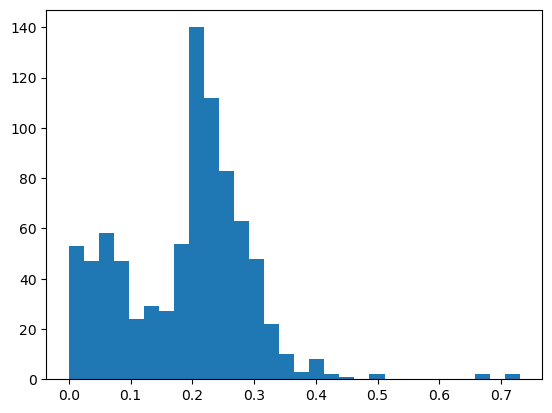

In [26]:
plt.hist(times_til_firstfix, bins=30)

In [23]:
np.mean(times_til_firstfix)
# number of seconds before first fixation

0.18885177217281857